In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:

data = pd.read_csv(os.getcwd() +  "/student_scores.csv")

data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.isna().count()

Hours     25
Scores    25
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<Axes: >

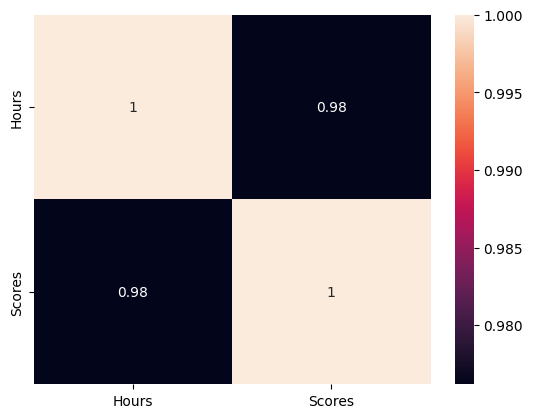

In [5]:
corr = data.corr()
sns.heatmap(corr, annot=True)

In [6]:
X = data['Hours'].array.reshape(-1, 1)
Y = data['Scores']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [7]:
algo = LinearRegression()
algo.fit(X_train, Y_train)

LinearRegression()

In [8]:
train_predict = algo.predict(X_train)

resulth = metrics.r2_score(Y_train, train_predict)

"resulth is = " + str(resulth * 100)[:5] + "%"

'resulth is = 95.20%'

In [9]:
Y_predict = algo.predict(X_test)
predicted = metrics.r2_score(Y_test, Y_predict)

"the reulth is = " + str(predicted * 100)[:5] + "%"

'the reulth is = 92.03%'

In [15]:
ssres = sum((Y_test-Y_predict)**2)
sstot = sum((Y_test-np.average(Y_test))**2)

1 - ssres / sstot

0.9203735896909309

<Axes: xlabel='Scores'>

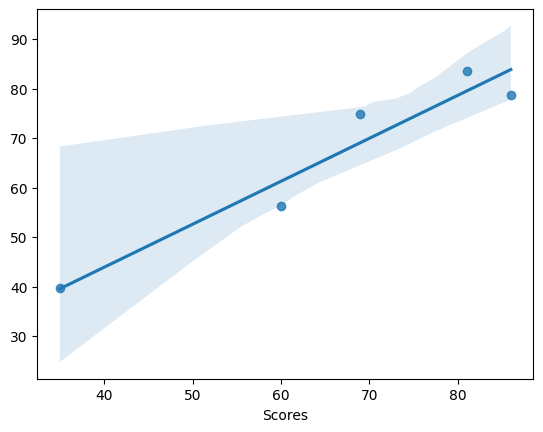

In [10]:
sns.regplot(x=Y_test, y=Y_predict)

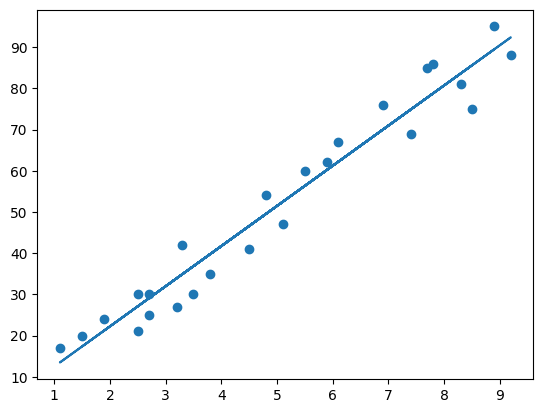

In [11]:
plt.scatter(X, Y)
plt.plot(X, algo.predict(X))